In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data

In [2]:
import os


def symbol_to_path(symbol, base_dir='data'):
    """Return csv file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    
        
    for symbol in symbols:
        df_temp = pd.read_csv(
            symbol_to_path(symbol),
            index_col='Date',
            parse_dates=True,
            usecols=['Date', 'Adj Close'],
            na_values=['nan'])
    
        # rename to prevent crashing
        df_temp = df_temp.rename(columns={'Adj Close': symbol})

        # Join
        df = df.join(df_temp)

    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)
    return df


def plot_data(df, title="Stock prices", xlabel='Date', ylabel='Prices'):
    """Plot stock prices with a custom title and meaningful axis labels"""
    ax = df.plot(title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.show()

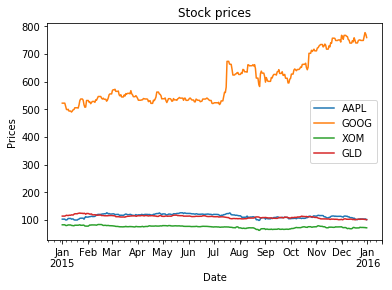

In [3]:
dates = pd.date_range('2015-01-01', '2015-12-31')
symbols = ['AAPL', 'GOOG', 'XOM', 'GLD']

df = get_data(symbols, dates)
plot_data(df)

## Normalized data

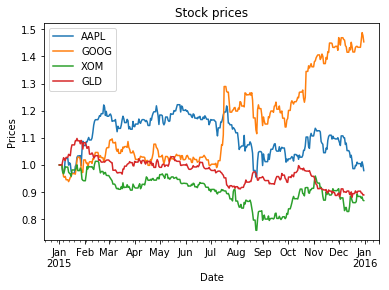

In [4]:
df = df/df.iloc[0, :]

ax = df.plot(title='Stock prices')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')

plt.show()

## Global Statistics

In [5]:
df.mean()

AAPL    1.107047
GOOG    1.151023
XOM     0.907867
GLD     0.975107
dtype: float64

In [6]:
df.std()

AAPL    0.069160
GOOG    0.156695
XOM     0.054392
GLD     0.048998
dtype: float64

In [7]:
df.median()

AAPL    1.109784
GOOG    1.073346
XOM     0.913915
GLD     0.980540
dtype: float64

In [8]:
df.sum()

AAPL    404.072033
GOOG    420.123293
XOM     331.371299
GLD     355.914177
dtype: float64

## Rolling Statistics

### Rolling mean and Bollinger bands

In [9]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window,center=False).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return values.rolling(window=window,center=False).std()


def get_bollinger_bands(rolling_mean, rolling_std):
    """Return upper and lower Bollinger Bands."""
    upper_band = rolling_mean + rolling_std * 2
    lower_band = rolling_mean - rolling_std * 2
    return upper_band, lower_band


def plot_bollinger_bands(symbol):
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df[symbol], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df[symbol], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df[symbol].plot(title="Bollinger Bands of " + symbol, label=symbol)
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()

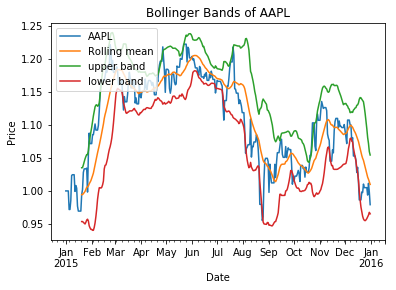

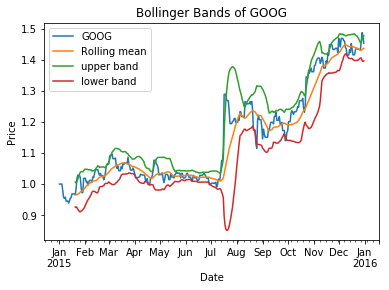

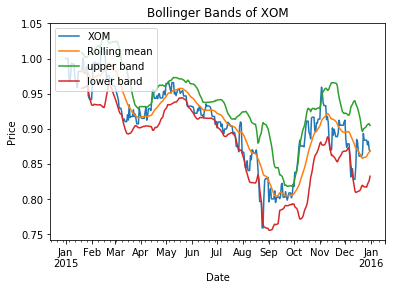

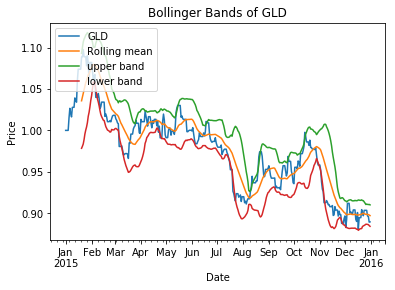

In [10]:
for sym in symbols:
    plot_bollinger_bands(sym);

### Daily return

In [11]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""

    # Copy given DataFrame to match size and column names
    daily_returns = df.copy()
    
    # Compute daily returns for row 1 onwards
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    
    # Set daily returns for row 0 to 0
    daily_returns.iloc[0, :] = 0
    
    return daily_returns


def compute_daily_returns_pandas(df):
    """Compute and return the daily return values."""
    daily_returns = (df / df.shift(1)) - 1
    
    # Set daily returns for row 0 to 0
    daily_returns.iloc[0, :] = 0
    return daily_returns

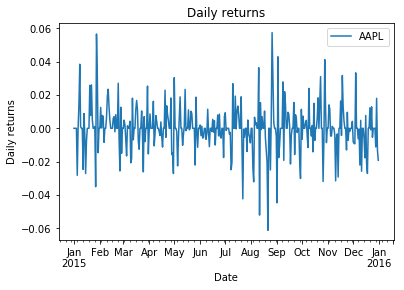

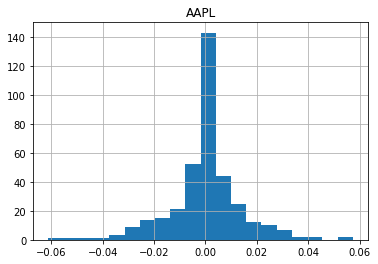

In [12]:
daily_returns = compute_daily_returns_pandas(pd.DataFrame(df['AAPL']))
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot daily returns histogram
daily_returns.hist(bins=20)
plt.show()

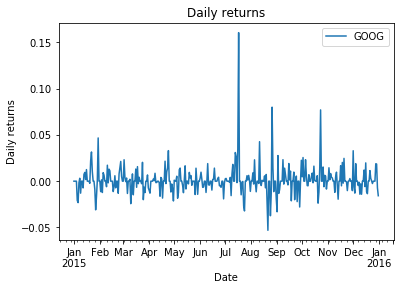

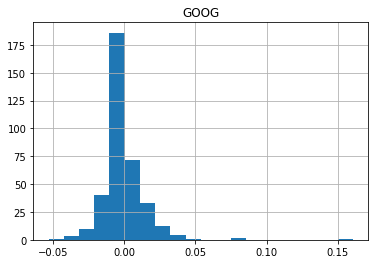

In [13]:
daily_returns = compute_daily_returns_pandas(pd.DataFrame(df['GOOG']))
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot daily returns histogram
daily_returns.hist(bins=20)
plt.show()

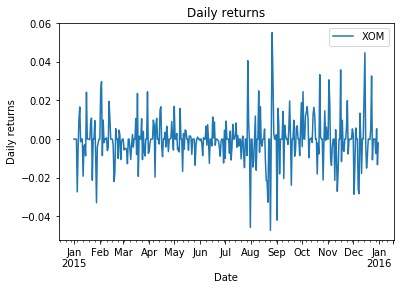

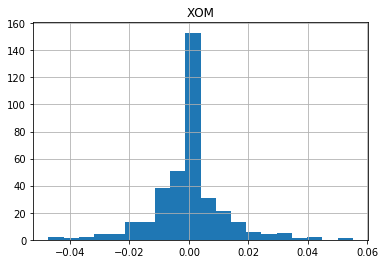

In [14]:
daily_returns = compute_daily_returns_pandas(pd.DataFrame(df['XOM']))
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot daily returns histogram
daily_returns.hist(bins=20)
plt.show()

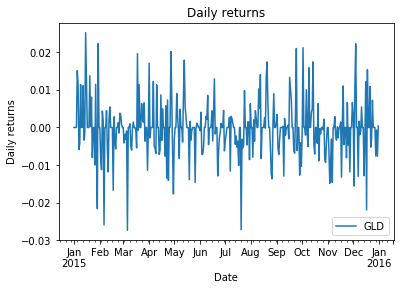

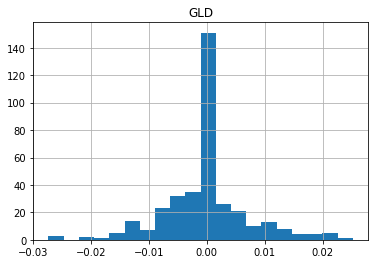

In [15]:
daily_returns = compute_daily_returns_pandas(pd.DataFrame(df['GLD']))
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot daily returns histogram
daily_returns.hist(bins=20)
plt.show()

## Lagged Correlation

In [16]:
from pandas.plotting import autocorrelation_plot

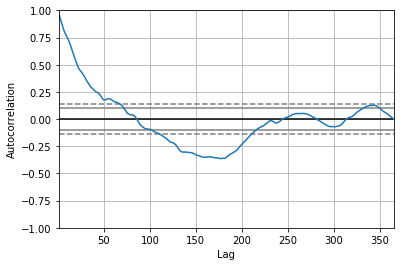

In [17]:
autocorrelation_plot(df['AAPL']);

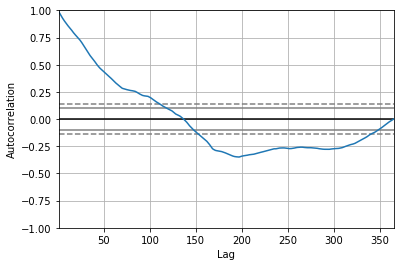

In [18]:
autocorrelation_plot(df['GOOG']);

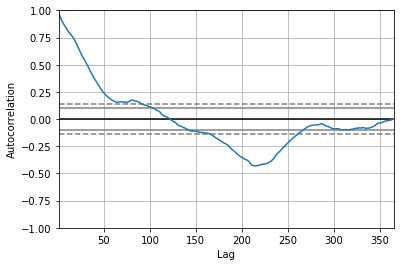

In [19]:
autocorrelation_plot(df['XOM']);

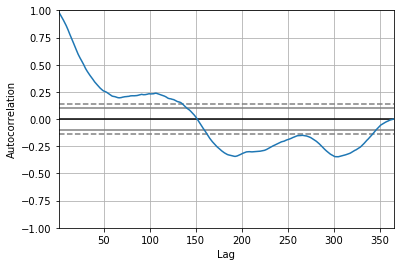

In [20]:
autocorrelation_plot(df['GLD']);